# AIML CA1 Part A 

# Imports

In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, recall_score

# ignore warnings 
import warnings
warnings.filterwarnings("ignore")

# random state 
import random
random.seed(43)

# importing models 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

# dummy for comparison with final model
from sklearn.dummy import DummyClassifier

# 1) Loading Data

In [3]:
# import factory_data.csv as factoryData
factoryData = pd.read_csv('factory_data.csv')

# 2) Analyzing Data

In [3]:
# show the dataset basic info
factoryData.info()
# we see that not all columns are in either int or float, so we need to encode them later on

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unique ID             20000 non-null  int64  
 1   Product ID            20000 non-null  object 
 2   Quality               19009 non-null  object 
 3   Ambient T (C)         20000 non-null  float64
 4   Process T (C)         19600 non-null  float64
 5   Rotation Speed (rpm)  18812 non-null  float64
 6   Torque (Nm)           20000 non-null  float64
 7   Tool Wear (min)       20000 non-null  int64  
 8   Machine Status        20000 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 1.4+ MB


In [4]:
# display basic statistics
factoryData.describe()
# we see that there is 20000 rows of data, and some columns have less than that suggesting missing data in some columns

,Unique ID,Ambient T (C),Process T (C),Rotation Speed (rpm),Torque (Nm),Tool Wear (min),Machine Status
count,20000.000000,20000.000000,19600.000000,18812.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,26.904930,36.904291,1538.795397,39.986910,107.951000,0.033900
std,5773.647028,2.000834,1.483647,178.674963,9.968684,63.652555,0.180976
min,1.000000,22.150000,32.550000,1168.000000,3.800000,0.000000,0.000000
25%,5000.750000,25.250000,35.750000,1423.000000,33.200000,53.000000,0.000000
50%,10000.500000,26.950000,36.950000,1503.000000,40.100000,108.000000,0.000000
75%,15000.250000,28.450000,37.950000,1613.000000,46.800000,162.000000,0.000000
max,20000.000000,31.450000,40.750000,2886.000000,76.600000,253.000000,1.000000


In [5]:
# check number of data using .shape
print('Shape of data : ', factoryData.shape)
# checked that there is indeed 20000 rows of data with 9 columns

Shape of data :  (20000, 9)


In [6]:
# display the distribution of 0s and 1s in target which is Machine Status
print(factoryData['Machine Status'].value_counts())
# number of 0s is too much compared to number of 1s, data is heavily skewed towards 0s

Machine Status
0    19322
1      678
Name: count, dtype: int64


# 3) Plotting Graphs 

Text(0.5, 1.0, 'Relatioship between Ambient Temperature and Ambient Temperature')

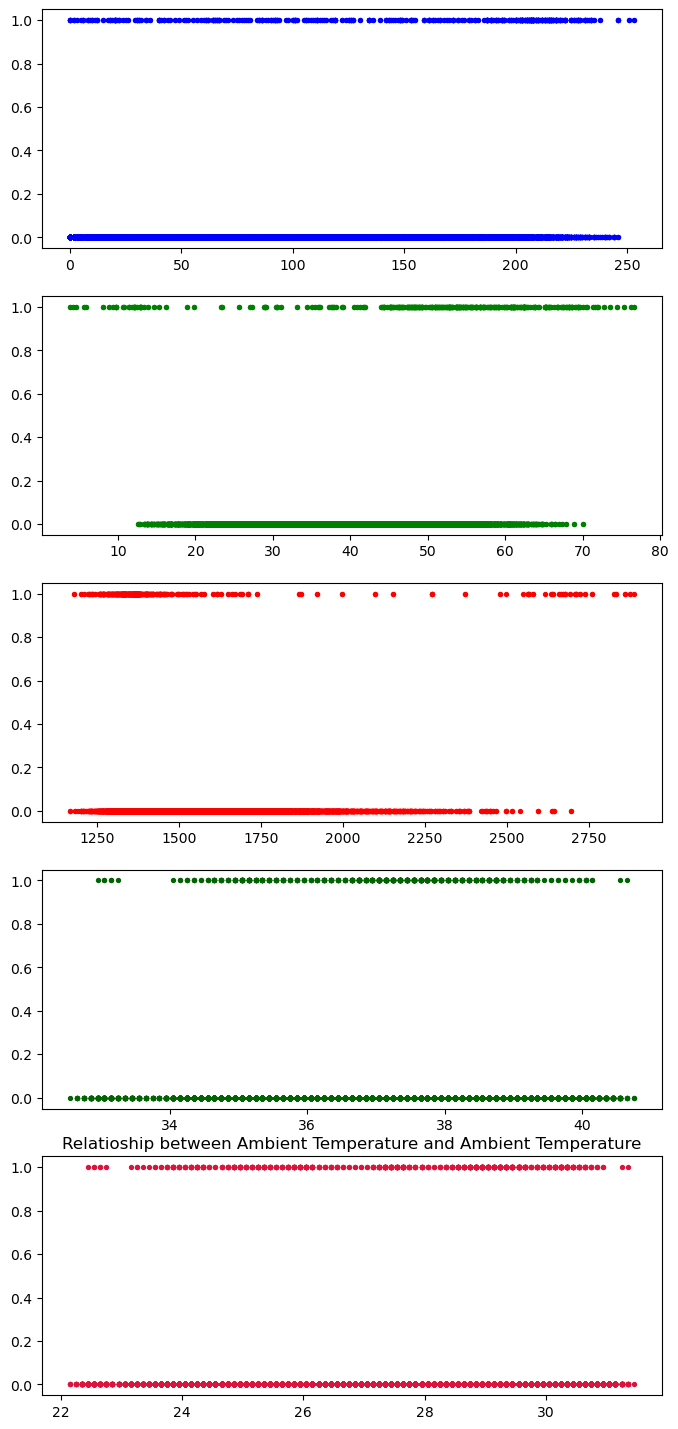

In [22]:
# scatter plots to see which feature impacts the machine status the most

# subplots
fig, axs = plt.subplots(5, 1, figsize=(8, 18))

# plot status with tool wear 
axs[0].scatter(factoryData['Tool Wear (min)'], factoryData['Machine Status'], s=8, color='blue')

# plot status with tool wear 
axs[1].scatter(factoryData['Torque (Nm)'], factoryData['Machine Status'], s=8, color='green')

# plot status with tool wear 
axs[2].scatter(factoryData['Rotation Speed (rpm)'], factoryData['Machine Status'], s=8, color='red')

# plot status with tool wear 
axs[3].scatter(factoryData['Process T (C)'], factoryData['Machine Status'], s=8, color='darkgreen')
plt.title('Relatioship between Process Temperature and Ambient Temperature')

# plot status with tool wear 
axs[4].scatter(factoryData['Ambient T (C)'], factoryData['Machine Status'], s=8, color='crimson')

# we can see that the two features that impact the machine status the most is the second and third scatter plot 

# second : torque 
# we can see that there is the highest concentration of dots in y=1 when torque is roughly above 45 
# this means that higher torque above 45 will lead to machines having a higher chance to work 

# third : rotation speed
# we can see that there is a highest concentration of dots in y=1 when rotation speed is  from 0 to roughly 1600
# this means that lower rotation speed up to 1600 will lead to machines having a higher chance to work 

# the other graphs with different features do not show relationships so they are less important factors contributing to whether the machines work or not. 

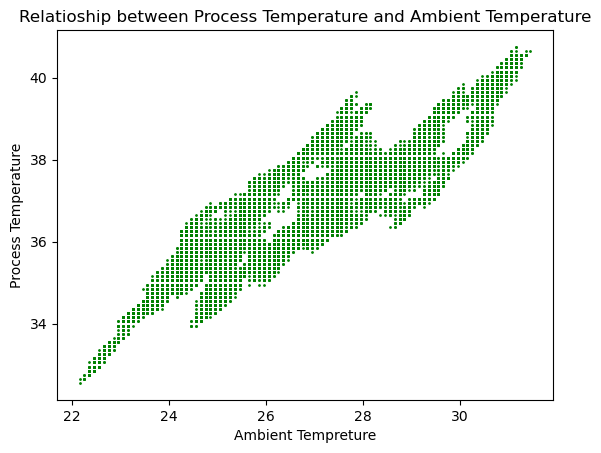

In [7]:
# scatterplot to show relationship between process and ambient temperature
plt.scatter(factoryData['Ambient T (C)'], factoryData['Process T (C)'], s=1, color='green')
plt.title('Relatioship between Process Temperature and Ambient Temperature')
plt.xlabel('Ambient Tempreture')
plt.ylabel('Process Temperature')
plt.show()
# we can see from the scatter plot that there is an increasing trend 
# as the ambient temperature increases, the process temperature increases as well 

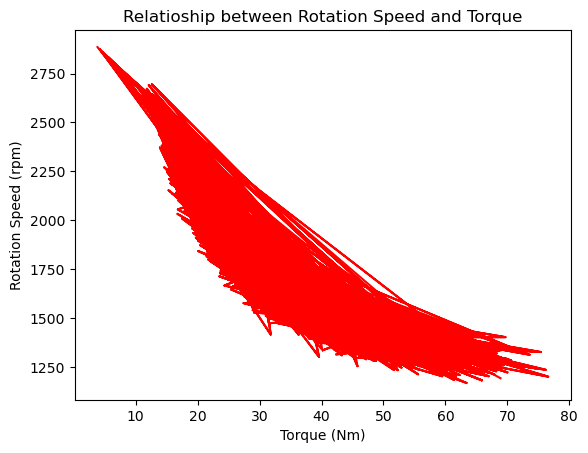

In [8]:
# line plot to view relationship between rotation speed and torque
plt.plot(factoryData['Torque (Nm)'], factoryData['Rotation Speed (rpm)'], color='red')
plt.title('Relatioship between Rotation Speed and Torque')
plt.xlabel('Torque (Nm)')
plt.ylabel('Rotation Speed (rpm)')
plt.show()
# we can see that it shows a decreasing trend
# as the rotation speed increases, the torque decreases 
# similarly, as torque increases, rotation speed decreases

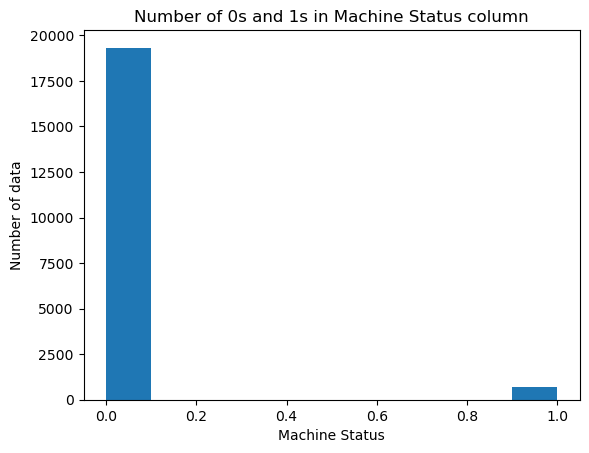

In [9]:
# histogram to view comparison between number of 0s and 1s
plt.hist(factoryData['Machine Status'])
plt.title('Number of 0s and 1s in Machine Status column')
plt.xlabel('Machine Status')
plt.ylabel('Number of data')
plt.show()
# we can see that there is way too many 0s as compared to 1s 
# this suggests that accuracy cannot be used to compare and determine model performance
# because since there are many 0s, a model can get high accuracy just by predicting all to be 0s

# 4) Preparing Data

In [10]:
# view number of missing data 
factoryData.isnull().sum()

Unique ID                  0
Product ID                 0
Quality                  991
Ambient T (C)              0
Process T (C)            400
Rotation Speed (rpm)    1188
Torque (Nm)                0
Tool Wear (min)            0
Machine Status             0
dtype: int64

In [11]:
# remove rows with missing data 
factoryData = factoryData.dropna()
factoryData.isnull().sum()
# after removing rows with missing data, we can double check again by isnull().sum()
# all the missing data has been successfully removed

Unique ID               0
Product ID              0
Quality                 0
Ambient T (C)           0
Process T (C)           0
Rotation Speed (rpm)    0
Torque (Nm)             0
Tool Wear (min)         0
Machine Status          0
dtype: int64

In [12]:
# first 5 rows of the dataset
factoryData.head()
# some columns of data are not useful 
# Unique ID and Product ID are used to identify the machine and do not affect Machine Status 
# we can remove these two rows of data such that it does not affect model performance 

,Unique ID,Product ID,Quality,Ambient T (C),Process T (C),Rotation Speed (rpm),Torque (Nm),Tool Wear (min),Machine Status
0,1,K12965,M,24.95,35.45,1551.0,42.8,0,0
1,2,Z62710,L,25.05,35.55,1408.0,46.3,3,0
2,3,T20224,L,24.95,35.35,1498.0,49.4,5,0
3,4,Z33024,L,25.05,35.45,1433.0,39.5,7,0
4,5,Z52839,L,25.05,35.55,1408.0,40.0,9,0


In [13]:
# drop 'unique ID' and 'Product ID' columns 
factoryData.drop(['Unique ID', 'Product ID'], axis=1, inplace=True)

# check head to see changes
factoryData.head()
# we can confirm that the columns have been dropped 

# we realise that the Quality column of data is in string form 
# only float or int can be used to train models 
# hence we need to encode it next

,Quality,Ambient T (C),Process T (C),Rotation Speed (rpm),Torque (Nm),Tool Wear (min),Machine Status
0,M,24.95,35.45,1551.0,42.8,0,0
1,L,25.05,35.55,1408.0,46.3,3,0
2,L,24.95,35.35,1498.0,49.4,5,0
3,L,25.05,35.45,1433.0,39.5,7,0
4,L,25.05,35.55,1408.0,40.0,9,0


In [14]:
# label encoding for Quality column
factoryData['Quality'] = factoryData['Quality'].map({'L': 0, 'M': 1, 'H': 2})
factoryData.head()  
# as seen in head L, M, H is transformed into 0, 1, 2
# label encoding is used instead of one hot or dummy as Quality can be ordered : L, M, H 
# machines of lower quality may have lower chances of functinoing while machines of higher quality may have higher chances of functioning
# now the data in Quality column can be used to train models

,Quality,Ambient T (C),Process T (C),Rotation Speed (rpm),Torque (Nm),Tool Wear (min),Machine Status
0,1,24.95,35.45,1551.0,42.8,0,0
1,0,25.05,35.55,1408.0,46.3,3,0
2,0,24.95,35.35,1498.0,49.4,5,0
3,0,25.05,35.45,1433.0,39.5,7,0
4,0,25.05,35.55,1408.0,40.0,9,0


In [15]:
# seperating data into data and targets 
# X is all the data, y is target
X = factoryData.drop(['Machine Status'], axis=1).values
y = factoryData['Machine Status'].values 

In [16]:
# train test split : train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y)
#  X_train and y_train is to be split further 
# y_test and y_test is training data and target
# stratify=y makes it such that the proportion of 0s and 1s remain the same when data is split in each respective group

# verifying data has been split
print('Testing data shape (X_test, y_test) :', X_test.shape, y_test.shape)

Testing data shape (X_test, y_test) : (3506, 6) (3506,)


In [17]:
# train test split : further split the train set into a new train and validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train)
# X_train and y_train for training models
# X_val and y_val is validation data used for selecing best performing models before evaluating the final best one

# verifying data has been split based on number of columns of data
print('Training data shape (X_train, y_train) :',X_train.shape, y_train.shape)
print('Validation data :', X_val.shape, y_val.shape)

Training data shape (X_train, y_train) : (11218, 6) (11218,)
Validation data : (2805, 6) (2805,)


# 5) Machine Learning Models

In [18]:
# models selected to train and compare
models = {
    'Logistic Regression' : LogisticRegression(),
    # Reason : Handles linearly separable data well in case the data provides a clear linear relationship to suggest machine status.
    'Decision Tree' : DecisionTreeClassifier(),
    # Reason : Handles non-linear relationships well in case there is no linear pattern to be found that leads to whether machine is working or not.
    'Random Forest' : RandomForestClassifier(),
    # Reason : Reduces overfitting compared to individual tree and has better generalization and accuracy in non-linear data, incase there is overfitting and incase there is non-linear relations.
    'Support Vector Classifier' : SVC(),
    # Reason : Effective in high-dimensional spaces and for data that might not have a clear linear relationship. 
    'KNN' : KNeighborsClassifier(),
    # Reason : Adapts well to patterns in data to look for patterns in identifying machine status.
    'Gradient Boosting' : GradientBoostingClassifier()
    # Reason : Works well with both structured and not that structured data, and that it is more accurate but more diffnicult to uderstand.
}

# defining kfold 
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# cross validating models with validation data to compare models as it is more accurate than just .fit()
for name, model in models.items():
    
    # f1 score calculation
    f1 = cross_val_score(model, X_val, y_val, cv=kf, scoring='f1')
    
    # recall calculation
    recall = cross_val_score(model, X_val, y_val, cv=kf, scoring='recall')

    # printing scores
    print(f'{name} :\nf1 score = {100*f1.mean():.2f}%,\nrecall = {100*recall.mean():.2f}%\n')

# we are calculating and evaluating models based on f1 score and recall 
# accuracy is not used as data is heavily skewed towards negative, if a model randomly guesses everything to be 0s, it can get a high accuracy too 
# recall is used as it is very important for the model to calculate the true positives 
# this is because, since there is very little positives in the dataset, it is more valueble to predict the positives correctly 
# specifically in this context, since many models are not functioning, it is very important to identify working ones so that they can be used
# f1 score is used as a secondary comparison as it is a balance of recall and precision, which can be used as a rough idea of a models performance 

Logistic Regression :
f1 score = 34.20%,
recall = 23.37%

Decision Tree :
f1 score = 69.65%,
recall = 75.03%

Random Forest :
f1 score = 67.19%,
recall = 55.72%

Support Vector Classifier :
f1 score = 0.00%,
recall = 0.00%

KNN :
f1 score = 34.62%,
recall = 23.54%

Gradient Boosting :
f1 score = 59.94%,
recall = 51.04%



# 6) Hyper Parameters Tuning

In [19]:
# merging training data with validation data
# this makes the training data even bigger and with more data, the model can trained better 
X_train = np.concatenate((X_train, X_val))
y_train = np.concatenate((y_train, y_val))
# we will then train the final model with this new training data and test it using the testing data

In [20]:
# it can be observed that the Decision Tree is the best performing model when tested on validation data 
# it's f1 score and recall score is the highest compared to the rest of the models
# hence, decision tree is selected as the best model
# now we tune its hyperparamteers for it to perform even better

# define hyperparameters to tune for best model
paramsToTune = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 7, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'max_leaf_nodes': [None, 10, 20, 50]
}

# tuning hyperparameters
DecisionTree = DecisionTreeClassifier() 
DecisionTree_grid = GridSearchCV(estimator=DecisionTree, param_grid=paramsToTune, cv=5, verbose=3, n_jobs=-1)
DecisionTree_grid.fit(X_train, y_train) 
# verbose=3 to see tuning progress, n_jobs=-1 for faster tuning as all processors in computer are to be used for tuning

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'max_features': [None, 'sqrt', 'log2'],
                         'max_leaf_nodes': [None, 10, 20, 50],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 7, 10]},
             verbose=3)

# 7) Final Model Performance

In [21]:
# evaluating best model based on test data
best_model = DecisionTree_grid.best_estimator_ 
best_model.fit(X_train, y_train)
bm_pred = best_model.predict(X_test)

# calculating bm recall and f1 score 
bm_f1 = f1_score(y_test, bm_pred, average='weighted')
bm_recall = recall_score(y_test, bm_pred)

# printing evaluation 
print('Model Performance :')
print('Prediction f1_score = {:0.1f}%.'.format(100 * bm_f1))
print('Prediction recall_score = {:0.1f}%.'.format(100 * bm_recall))
# after hyperparameter tuning for the best parameters, the model performed better than before when prediting test data

Model Performance :
Prediction f1_score = 98.8%.
Prediction recall_score = 82.4%.


In [22]:
# bm classification report 
print(classification_report(y_test, bm_pred))
# this shows all scores including accuracy, f1, recall and precision for positives and negatives for Decision Tree (bm)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3387
           1       0.82      0.82      0.82       119

    accuracy                           0.99      3506
   macro avg       0.91      0.91      0.91      3506
weighted avg       0.99      0.99      0.99      3506



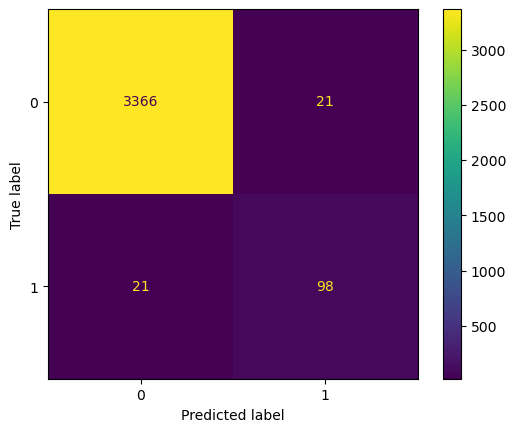

In [23]:
# bm confusion matrix
# to see how many positives and negatives were wrongly predicted by bm
bm_cm = confusion_matrix(y_test, bm_pred)
display_cm = ConfusionMatrixDisplay(bm_cm)
display_cm.plot()

# 8) Dummy

In [24]:
# dummy classifier for comparing with bm
dummy = DummyClassifier() 
dummy.fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

# accuracy and f1 score of dummy
dummy_recall = recall_score(y_test, dummy_pred)
dummy_f1 = f1_score(y_test, dummy_pred, average='weighted')
print(f'Dummy Regressor has an f1 score of {dummy_f1*100:.2f}% and a recall score of {dummy_recall*100:.2f}%!')
# recall and f1 score of dummy is observed to be much lower than the best model's
# this suggests much poorer performance compared to best model

Dummy Regressor has an f1 score of 94.94% and a recall score of 0.00%!


In [25]:
# dummy classification report 
print(classification_report(y_test, dummy_pred))
# this shows all scores including accuracy, f1, recall and precision for positives and negatives for dummy
# comparing this to that of the best model's, the dummy performed much worst

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3387
           1       0.00      0.00      0.00       119

    accuracy                           0.97      3506
   macro avg       0.48      0.50      0.49      3506
weighted avg       0.93      0.97      0.95      3506



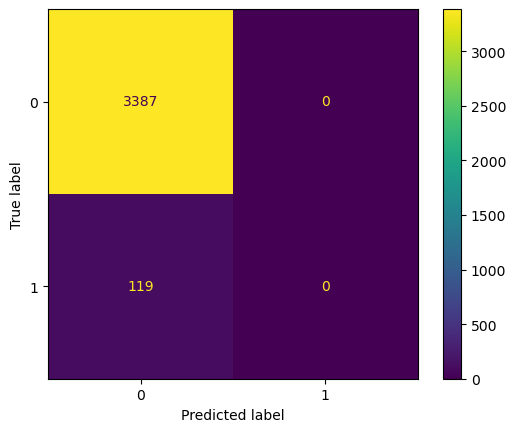

In [26]:
# dummy confusion matrix
dummy_cm = confusion_matrix(y_test, dummy_pred)
display_cm = ConfusionMatrixDisplay(dummy_cm)
display_cm.plot()
# to see how many positives and negatives were wrongly predicted by dummy
# dummy performed much worse because it predicted all negatives

# Conclusion

In conclusion, the best model for this classification problem is Random Forest. 
The performance of this model was improved after tuning its hyperparameters. 
When compared to the dummy, Random Forest did much better in comparison, this is due to dummy only predicting negatives while Random Forest predicted many positives and negatives correctly.